Columns: ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows', 'fake']

Fake vs. Real Distribution:
fake
0    2500
1    2500
Name: count, dtype: int64


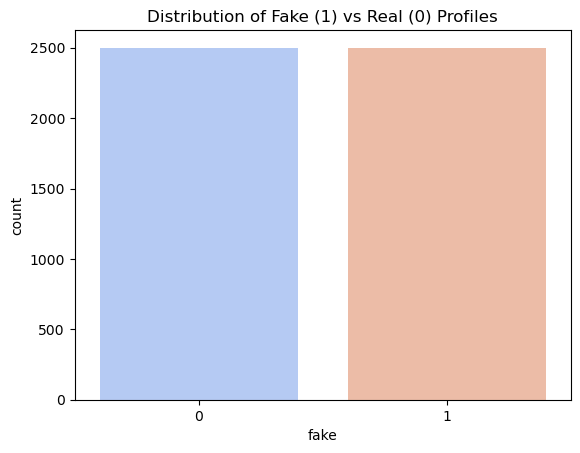


Evaluation Metrics:
Accuracy  : 0.9680
Precision : 0.9737
Recall    : 0.9620
F1-Score  : 0.9678
ROC-AUC   : 0.9944

Detailed Classification Report:

              precision    recall  f1-score   support

           0     0.9625    0.9740    0.9682       500
           1     0.9737    0.9620    0.9678       500

    accuracy                         0.9680      1000
   macro avg     0.9681    0.9680    0.9680      1000
weighted avg     0.9681    0.9680    0.9680      1000



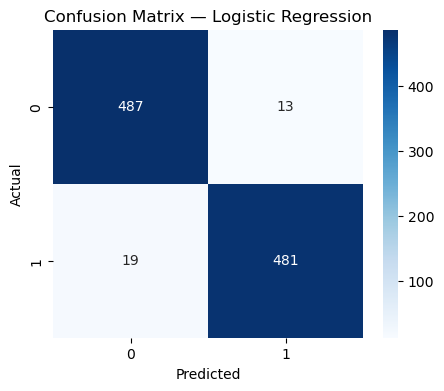

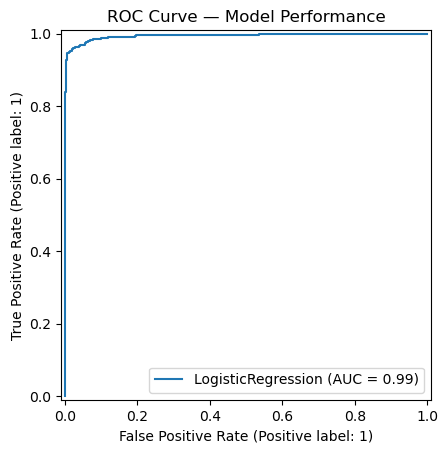

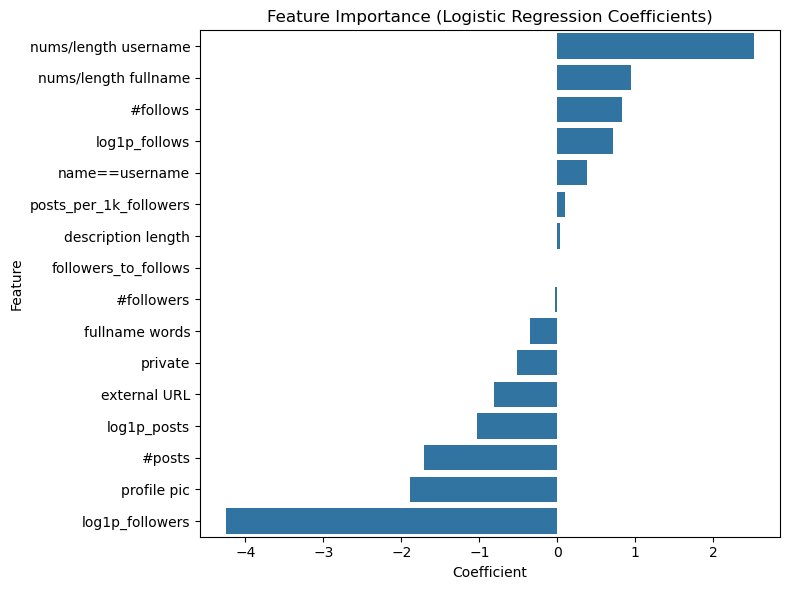


 * Combined Predictive Question:
Single logistic regression model predicts fake vs real and identifies key predictors.

 * Defining Accurate Classifier:
Accuracy, Precision, Recall, F1, and ROC-AUC used for balanced assessment.

 * Use of Profile Attributes:
profile pic, fullname words, and external URL are binary/numeric indicators of authenticity.

 * Dataset Distribution:
Balanced dataset (2500 fake, 2500 real) ensures no model bias.


In [35]:
# Fake Instagram Profile Detection — Model Evaluation and Analysis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("D:\\FALL_2025\\INSY5377-WebAndSocialAnalytics\\Project\\Instagram_fake_profile_dataset.csv")

# Verify columns
print("Columns:", list(df.columns))

# Dataset Distribution (Answer to Q4)
print("\nFake vs. Real Distribution:")
print(df['fake'].value_counts())
sns.countplot(x='fake', hue='fake', data=df, palette='coolwarm', legend=False)
plt.title("Distribution of Fake (1) vs Real (0) Profiles")
plt.show()

# Comment:
# Balanced dataset: 2500 fake, 2500 real → no class imbalance problem.
# Feature Engineering (Answers Q1 + Q3)
eps = 1e-6

# Ratios & completeness features
df['followers_to_follows'] = df['#followers'] / (df['#follows'] + eps)
df['posts_per_1k_followers'] = df['#posts'] / ((df['#followers'] + eps) / 1000)

# Log transform to normalize skewed values
for col in ['#followers', '#follows', '#posts']:
    df[f'log1p_{col[1:]}'] = np.log1p(df[col])

# Example of "profile completeness" features (profile pic, fullname words, external URL)
# These are already encoded as binary/numeric → directly usable.

# Define Features (X) and Target (y)
X = df.drop(columns=['fake'])
y = df['fake']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=[np.number]).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Training (Combined Predictive Question)
# Build one unified classifier to predict and find important features
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics (Answer to Q2)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("\nEvaluation Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve Visualization
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve — Model Performance")
plt.show()

# Feature Importance (Interpretation of Attributes)
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()

# Comment:
# High positive coefficients → increase probability of being fake
# Negative coefficients → indicate more genuine profiles

# Summary Notes (Answers Overview)
print("\n * Combined Predictive Question:")
print("Single logistic regression model predicts fake vs real and identifies key predictors.")

print("\n * Defining Accurate Classifier:")
print("Accuracy, Precision, Recall, F1, and ROC-AUC used for balanced assessment.")

print("\n * Use of Profile Attributes:")
print("profile pic, fullname words, and external URL are binary/numeric indicators of authenticity.")

print("\n * Dataset Distribution:")
print("Balanced dataset (2500 fake, 2500 real) ensures no model bias.")
